In [1]:
from yahoo_oauth import OAuth2
import pandas as pd
import numpy as np
import yahoo_fantasy_api as yfa
import tensorflow as tf

#https://yahoo-fantasy-api.readthedocs.io/en/latest/yahoo_fantasy_api.html#the-league-class

In [2]:
conn = OAuth2(None, None, from_file='private.json')
#conn.refresh_access_token()

if not conn.token_is_valid():
    conn.refresh_access_token()

[2020-08-16 21:35:12,937 DEBUG] [yahoo_oauth.oauth.__init__] Checking 
[2020-08-16 21:35:12,940 DEBUG] [yahoo_oauth.oauth.token_is_valid] ELAPSED TIME : 1902.2426507472992
[2020-08-16 21:35:12,941 DEBUG] [yahoo_oauth.oauth.token_is_valid] TOKEN IS STILL VALID
[2020-08-16 21:35:12,943 DEBUG] [yahoo_oauth.oauth.token_is_valid] ELAPSED TIME : 1902.245591878891
[2020-08-16 21:35:12,944 DEBUG] [yahoo_oauth.oauth.token_is_valid] TOKEN IS STILL VALID


In [3]:
league = yfa.League(conn,'nfl.l.254924')
#free_agents = pd.DataFrame(league.free_agents('RB'))
##get the free agents
#list_free_agents = list(free_agents['player_id'])

#players = pd.DataFrame(league.player_stats(list_free_agents, 'season', season=2019))
#pd.DataFrame(league.player_details('Lamar Jackson'))



In [4]:
# Grab season stats and calculate points
# Join points to prior season

#thisSeason = 2018
#priorSeason = thisSeason - 1

points = {
    'Pass Yds': 0.04,
    'Pass TD': 4,
    'Int': -1,
    'Rush Att': 0.1,
    'Rush TD': 6,
    'Rec': 1,
    'Rec Yds': 0.1,
    'Rec TD': 6,
    'Ret TD': 6,
    '2-PT': 2,
    'Fum Lost': -2,
    'Fum Ret TD': 2
}
"""
thisSeasonStats = pd.DataFrame(league.player_stats(list_free_agents, 'season', season = thisSeason))

# Calculate offensive points
thisSeasonStats['Points'] = thisSeasonStats['Pass Yds'] * points['Pass Yds'] + thisSeasonStats['Pass TD'] * points['Pass TD'] + thisSeasonStats['Int'] * points['Int'] + thisSeasonStats['Rush Att'] * points['Rush Att'] + thisSeasonStats['Rush TD'] * points['Rush TD'] + thisSeasonStats['Rec'] * points['Rec'] + thisSeasonStats['Rec Yds'] * points['Rec Yds'] + thisSeasonStats['Rec TD'] * points['Rec TD'] + thisSeasonStats['Ret TD'] * points['Ret TD'] + thisSeasonStats['2-PT'] * points['2-PT'] + thisSeasonStats['Fum Lost'] * points['Fum Lost'] + thisSeasonStats['Fum Ret TD'] * points['Fum Ret TD'] 

thisSeasonPoints = thisSeasonStats[['player_id','Points']].copy()
thisSeasonPoints

lastSeasonStats = pd.DataFrame(league.player_stats(list_free_agents, 'season', season = priorSeason))
"""

"\nthisSeasonStats = pd.DataFrame(league.player_stats(list_free_agents, 'season', season = thisSeason))\n\n# Calculate offensive points\nthisSeasonStats['Points'] = thisSeasonStats['Pass Yds'] * points['Pass Yds'] + thisSeasonStats['Pass TD'] * points['Pass TD'] + thisSeasonStats['Int'] * points['Int'] + thisSeasonStats['Rush Att'] * points['Rush Att'] + thisSeasonStats['Rush TD'] * points['Rush TD'] + thisSeasonStats['Rec'] * points['Rec'] + thisSeasonStats['Rec Yds'] * points['Rec Yds'] + thisSeasonStats['Rec TD'] * points['Rec TD'] + thisSeasonStats['Ret TD'] * points['Ret TD'] + thisSeasonStats['2-PT'] * points['2-PT'] + thisSeasonStats['Fum Lost'] * points['Fum Lost'] + thisSeasonStats['Fum Ret TD'] * points['Fum Ret TD'] \n\nthisSeasonPoints = thisSeasonStats[['player_id','Points']].copy()\nthisSeasonPoints\n\nlastSeasonStats = pd.DataFrame(league.player_stats(list_free_agents, 'season', season = priorSeason))\n"

In [10]:
# join both tables together
df = thisSeasonPoints.merge(lastSeasonStats, on = 'player_id')

# drop name
df.drop(columns = ['name'])

,player_id,Points,position_type,Pass Yds,Pass TD,Int,Rush Att,Rush Yds,Rush TD,Rec,Rec Yds,Rec TD,Ret TD,2-PT,Fum Lost,Fum Ret TD,Targets
0,7241,46.0,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8261,109.9,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9317,91.9,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24760,42.7,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24815,91.8,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,33281,0.0,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,33297,0.0,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,33309,0.0,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,33345,0.0,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
def pullStatsAndPoints(season: int, league: yfa.League, points: dict, position: str):
    freeAgents = pd.DataFrame(league.free_agents(position))
    freeAgentList = list(freeAgents['player_id'])
    # freeAgentList = [i for i in range(100,50000)]
    priorSeason = season - 1


    thisSeasonStats = pd.DataFrame(league.player_stats(freeAgentList, 'season', season = season))

    # Calculate offensive points
    thisSeasonStats['Points'] = thisSeasonStats['Pass Yds'] * points['Pass Yds'] + thisSeasonStats['Pass TD'] * points['Pass TD'] + thisSeasonStats['Int'] * points['Int'] + thisSeasonStats['Rush Att'] * points['Rush Att'] + thisSeasonStats['Rush TD'] * points['Rush TD'] + thisSeasonStats['Rec'] * points['Rec'] + thisSeasonStats['Rec Yds'] * points['Rec Yds'] + thisSeasonStats['Rec TD'] * points['Rec TD'] + thisSeasonStats['Ret TD'] * points['Ret TD'] + thisSeasonStats['2-PT'] * points['2-PT'] + thisSeasonStats['Fum Lost'] * points['Fum Lost'] + thisSeasonStats['Fum Ret TD'] * points['Fum Ret TD'] 

    thisSeasonPoints = thisSeasonStats[['player_id','Points']].copy()
    
    lastSeasonStats = pd.DataFrame(league.player_stats(freeAgentList, 'season', season = priorSeason))
    df = thisSeasonPoints.merge(lastSeasonStats, on = 'player_id')
    df = df.drop(columns = ['name'])    

    return df

masterTable = pd.DataFrame()
seasonList = [2016, 2017, 2018, 2019]
for s in seasonList:
    interimTable = pullStatsAndPoints(s, league, points, 'RB')
    masterTable = masterTable.append(interimTable)

# Remove 0 rows
masterTable = masterTable.loc[masterTable['Points'] != 0]
#masterTable

In [52]:
import sklearn as sklearn

masterTable.describe()

reg = sklearn.linear_model.LinearRegression().fit(x, y)
print(reg.score(x, y))
print(reg.coef_)

0.21975979253377687
[ 3.14802380e+00  2.12899097e+01 -2.32918157e+01 -4.75668085e-01
  1.02084162e-01  5.98854909e+00  1.42876628e-01 -2.90680575e-02
  8.63297328e+00 -1.86517468e-14 -1.30969553e+01  4.08889339e-02
  0.00000000e+00  2.44287442e-01]


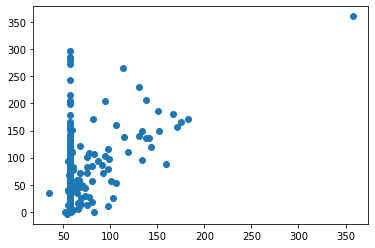

In [53]:
plt.scatter(reg.predict(x), y)
plt.show()